### THIS IS THE BASIC IPYNB FILE WHICH SERVES AS THE BASE FOR 'app.py', used in deployment

In [1]:
import pandas as pd
import numpy as np
import string
import re
import pickle as pk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB as mn
import streamlit as st
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.metrics import classification_report

## LOADING DATA

In [2]:
data = pd.read_csv('movie_review.csv', delimiter = ',')

In [3]:
reviews = data['text']
targets = data['tag']

## PREPROCESSING DATA

In [13]:
stopwords = set(STOPWORDS)
def clean(data):
    
    clean_data = []
    punc = list(string.punctuation)
    for line in data:
        words = []
        for word in line.split():
            #removing punctuations (like @ or #)
            t = [w for w in word if w not in punc]
            word = "".join(t)
            #removing numbers
            word = re.sub(r"\d+", "", word)
            #removing URLs
            word = re.sub(r'https?\S+', '', word)
            word = word.lower()
            
            if(len(word) > 2 and word not in stopwords):
                words.append(word)
                
        clean_data.append(" ".join(words))
    
    return clean_data

In [14]:
clean_words = clean(reviews)

## VISUALIZING THE DATA (WORDCLOUD)

In [7]:
words_freqs = Counter()
words = []
for line in clean_words:
    for word in line.split():
        if(word not in stopwords):
            words.append(word)
top_50 = Counter(words).most_common(50)
top_50_words = [w for w,f in top_50]

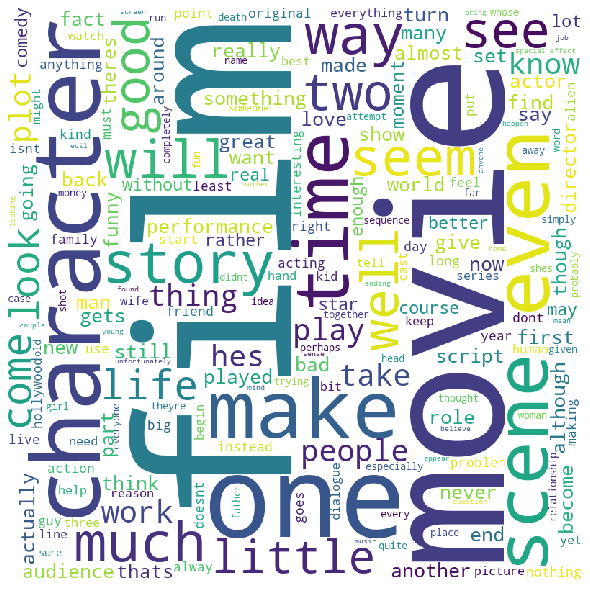

In [8]:
comment_words = " ".join(words) + " "
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## FITTING THE DATA

In [15]:
X_train, X_test, Y_train, Y_test = tts(clean_words, targets, test_size = 0.1)

In [22]:
cv = TfidfVectorizer(ngram_range = (1, 3), max_features = 75000)
X = cv.fit_transform(X_train).todense()

In [23]:
clf = mn()
clf.fit(X, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## TESTING

In [24]:
test_data = cv.transform(X_test)
preds = clf.predict(test_data)
print(classification_report(preds, Y_test))

              precision    recall  f1-score   support

         neg       0.65      0.73      0.68      2833
         pos       0.76      0.69      0.73      3639

    accuracy                           0.71      6472
   macro avg       0.71      0.71      0.71      6472
weighted avg       0.71      0.71      0.71      6472

